<a href="https://colab.research.google.com/github/Soyeon20220610/githubTest/blob/main/C4W1_CNN_happyfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

images of people's faces

build a ConvNet that determines whether the people in the images are smiling or not.

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


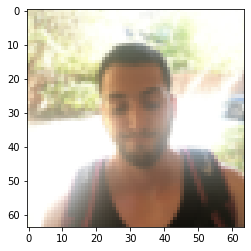

In [4]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [7]:
def happyModel():
  model = tf.keras.Sequential([
                               tfl.ZeroPadding2D(padding=(3,3),input_shape=(64,64,3),data_format='channels_last'),
                               tfl.Conv2D(filters= 32,kernel_size=(7,7),strides=(1,1),name='conv0'),
                               tfl.BatchNormalization(axis=3),
                               tfl.ReLU(),
                               tfl.MaxPool2D(),
                               tfl.Flatten(),
                               tfl.Dense(1,activation='sigmoid')
  ])
  return model

happy_model = happyModel()
for layer in summary(happy_model):
  print (layer)

output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]

comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [9]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [10]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 5s 111ms/step - loss: 0.9972 - accuracy: 0.7267
Epoch 2/10
38/38 [==============================] - 4s 117ms/step - loss: 0.2483 - accuracy: 0.9033
Epoch 3/10
38/38 [==============================] - 4s 107ms/step - loss: 0.2101 - accuracy: 0.9150
Epoch 4/10
38/38 [==============================] - 4s 109ms/step - loss: 0.1055 - accuracy: 0.9667
Epoch 5/10
38/38 [==============================] - 4s 107ms/step - loss: 0.0925 - accuracy: 0.9700
Epoch 6/10
38/38 [==============================] - 4s 109ms/step - loss: 0.1860 - accuracy: 0.9267
Epoch 7/10
38/38 [==============================] - 4s 108ms/step - loss: 0.1373 - accuracy: 0.9450
Epoch 8/10
38/38 [==============================] - 4s 109ms/step - loss: 0.1646 - accuracy: 0.9367
Epoch 9/10
38/38 [==============================] - 4s 109ms/step - loss: 0.0795 - accuracy: 0.9733
Epoch 10/10
38/38 [==============================] - 4s 108ms/step - loss: 0.0615 - accuracy: 0.9783

In [11]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 56ms/step - loss: 0.1882 - accuracy: 0.8933


[0.18824338912963867, 0.8933333158493042]

signs data


In [19]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


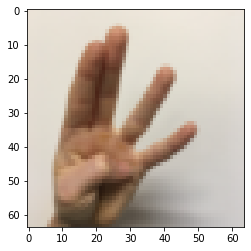

In [20]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [21]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [23]:
def convolutional_model(input_shape):
  input_img = tf.keras.Input(shape=input_shape)
  Z1 = tf.keras.layers.Conv2D(filters=8,kernel_size=(4,4),padding='same')(input_img)
  A1 = tf.keras.layers.ReLU()(Z1)
  P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)
  Z2 = tf.keras.layers.Conv2D(filters=16,kernel_size=(2,2),padding='same')(P1)
  A2 = tf.keras.layers.ReLU()(Z2)
  P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)
  F = tf.keras.layers.Flatten()(P2)
  outputs = tf.keras.layers.Dense(units= 6, activation='softmax')(F)

  model = tf.keras.Model(inputs=input_img,outputs=outputs)
  return model


In [24]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()


output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [25]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 5s 249ms/step - loss: 1.8240 - accuracy: 0.1583 - val_loss: 1.7944 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 3s 149ms/step - loss: 1.7931 - accuracy: 0.1519 - val_loss: 1.7862 - val_accuracy: 0.1750
Epoch 3/100
17/17 [==============================] - 2s 109ms/step - loss: 1.7850 - accuracy: 0.2213 - val_loss: 1.7806 - val_accuracy: 0.2333
Epoch 4/100
17/17 [==============================] - 2s 108ms/step - loss: 1.7800 - accuracy: 0.2343 - val_loss: 1.7758 - val_accuracy: 0.2000
Epoch 5/100
17/17 [==============================] - 2s 108ms/step - loss: 1.7756 - accuracy: 0.2454 - val_loss: 1.7715 - val_accuracy: 0.2000
Epoch 6/100
17/17 [==============================] - 2s 108ms/step - loss: 1.7718 - accuracy: 0.2537 - val_loss: 1.7674 - val_accuracy: 0.2583
Epoch 7/100
17/17 [==============================] - 2s 108ms/step - loss: 1.7676 - accuracy: 0.2852 - val_loss: 1.7619 - val_accuracy: 0.2583

In [26]:
history.history

{'accuracy': [0.15833333134651184,
  0.1518518477678299,
  0.2212962955236435,
  0.23425926268100739,
  0.24537037312984467,
  0.2537037134170532,
  0.28518518805503845,
  0.2777777910232544,
  0.28703704476356506,
  0.3157407343387604,
  0.317592591047287,
  0.3185185194015503,
  0.34259259700775146,
  0.3620370328426361,
  0.36666667461395264,
  0.3768518567085266,
  0.38240739703178406,
  0.3888888955116272,
  0.4046296179294586,
  0.4000000059604645,
  0.42222222685813904,
  0.4435185194015503,
  0.46574074029922485,
  0.46666666865348816,
  0.48240742087364197,
  0.4870370328426361,
  0.49074074625968933,
  0.4990740716457367,
  0.5055555701255798,
  0.5166666507720947,
  0.5277777910232544,
  0.5453703999519348,
  0.5546296238899231,
  0.5648148059844971,
  0.5740740895271301,
  0.585185170173645,
  0.6018518805503845,
  0.6111111044883728,
  0.6194444298744202,
  0.6333333253860474,
  0.635185182094574,
  0.644444465637207,
  0.6537036895751953,
  0.6657407283782959,
  0.6712962

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

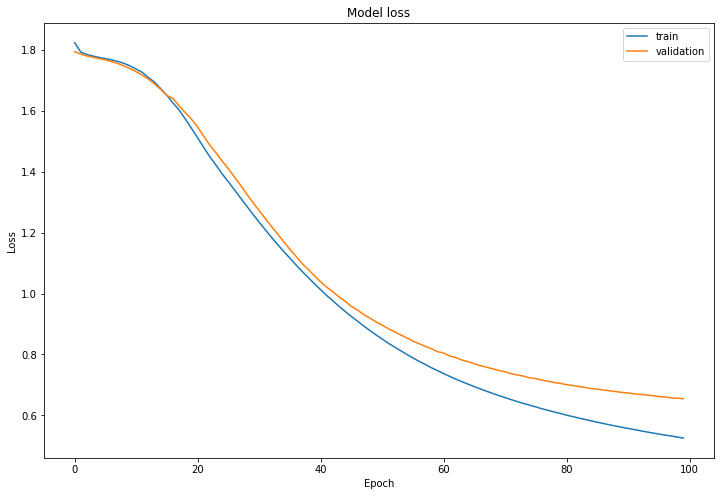

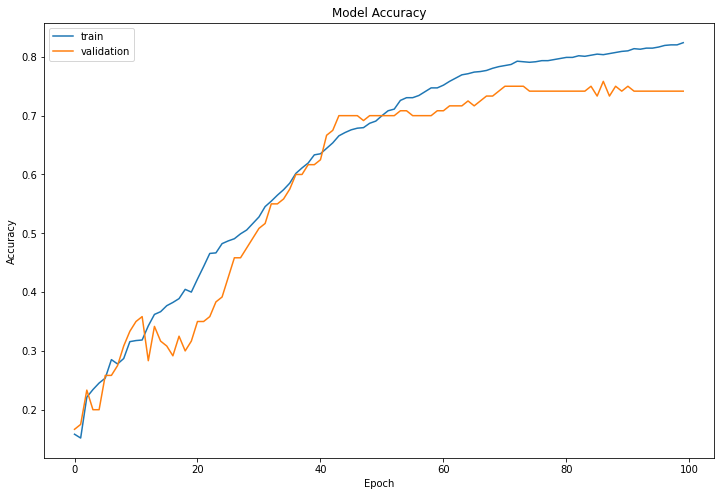

In [27]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)

df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')